## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_df

#not sure I need the how="outer"

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_df= merge_df.duplicated(["Mouse ID", "Timepoint"], keep=False)
duplicate_mice_df.head()
duplicate_mice= merge_df.duplicated(["Mouse ID", "Timepoint"], keep=False)
print(duplicate_mice)
# print(display(duplicate_mice=True))
# duplicate_mice = duplicate_mice_df 
# duplicate_mice_df.loc(True)  -wont work b/c the bool is not in a column and duplicate mice is not a df

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicaterow_df = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicaterow_df.head(10)
# print(duplicaterow)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# merge2_df = merge_df.drop(duplicaterow)
# merge2_df
merge2_df = merge_df.drop_duplicates(["Mouse ID", "Timepoint"], keep=False)
merge2_df
# merge_df = merge_df.drop_duplicates(merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"], keep=False)])
# merge_df
# merge2_df = merge_df.drop_duplicates(["Mouse ID", "Timepoint"])
# merge2_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
merge2_df["Mouse ID"].nunique()



249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

counts = merge2_df['Drug Regimen'].value_counts()
counts
print(counts)
result = merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']]
result.head()
capomulin_df = result[result['Drug Regimen'].isin(["Capomulin"])]
capomulin_df.head()
c_mean = capomulin_df.mean()
c_median = capomulin_df.median()
c_var = capomulin_df.var()
c_std = capomulin_df.std()
c_sem = capomulin_df.sem()

capomulinstat_list = [c_mean, c_median, c_var, c_std, c_sem]

ramicane_df = result[result['Drug Regimen'].isin(["Ramicane"])]
ramicane_df.head()
r_mean = ramicane_df.mean()
r_mean
r_median = ramicane_df.median()
r_median
r_var = ramicane_df.var()
r_var
r_std = ramicane_df.std()
r_std
r_sem = ramicane_df.sem()
r_sem
ramicanestat_list = [r_mean, r_median, r_var, r_std, r_sem]
ramicanestat_list

ketapril_df = result[result['Drug Regimen'].isin(["Ketapril"])]
ketapril_df.head()

k_mean = ketapril_df.mean()
k_median = ketapril_df.median()
k_var = ketapril_df.var()
k_std = ketapril_df.std()
k_sem = ketapril_df.sem()
ketapril_list = [k_mean, k_median, k_var, k_std, k_sem]
ketapril_list

naftisol_df = result[result['Drug Regimen'].isin(["Naftisol"])]
naftisol_df.head()

n_mean = naftisol_df.mean()
n_median = naftisol_df.median()
n_var = naftisol_df.var()
n_std = naftisol_df.std()
n_sem = naftisol_df.sem()
naftisol_list = [n_mean, n_median, n_var, n_std, n_sem]
naftisol_list

zoniferol_df = result[result['Drug Regimen'].isin(["Zoniferol"])]
zoniferol_df.head()

z_mean = zoniferol_df.mean()
z_median = zoniferol_df.median()
z_var = zoniferol_df.var()
z_std = zoniferol_df.std()
z_sem = zoniferol_df.sem()
zoniferol_list = [z_mean, z_median, z_var, z_std, z_sem]
zoniferol_list

# Capomulin    230
# Ramicane     228
# Ketapril     188
# Naftisol     186
# Zoniferol    182


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     151
Name: Drug Regimen, dtype: int64


[Tumor Volume (mm3)    53.236507
 dtype: float64,
 Tumor Volume (mm3)    51.818479
 dtype: float64,
 Tumor Volume (mm3)    48.533355
 dtype: float64,
 Tumor Volume (mm3)    6.966589
 dtype: float64,
 Tumor Volume (mm3)    0.516398
 dtype: float64]

In [8]:
placebo_df = result[result['Drug Regimen'].isin(["Placebo"])]
placebo_df.head()

p_mean = placebo_df.mean()
p_median = placebo_df.median()
p_var = placebo_df.var()
p_std = placebo_df.std()
p_sem = placebo_df.sem()
placebo_list = [p_mean, p_median, p_var, p_std, p_sem]
placebo_list

stelasyn_df = result[result['Drug Regimen'].isin(["Stelasyn"])]
stelasyn_df.head()

s_mean = stelasyn_df.mean()
s_median = stelasyn_df.median()
s_var = stelasyn_df.var()
s_std = stelasyn_df.std()
s_sem = stelasyn_df.sem()
stelasyn_list = [s_mean, s_median, s_var, s_std, s_sem]
stelasyn_list

ceftamin_df = result[result['Drug Regimen'].isin(["Ceftamin"])]
ceftamin_df.head()

ce_mean = ceftamin_df.mean()
ce_median = ceftamin_df.median()
ce_var = ceftamin_df.var()
ce_std = ceftamin_df.std()
ce_sem = ceftamin_df.sem()
ceftamin_list = [ce_mean, ce_median, ce_var, ce_std, ce_sem]
ceftamin_list

infubinol_df = result[result['Drug Regimen'].isin(["Infubinol"])]
infubinol_df.head()

i_mean = infubinol_df.mean()
i_median = infubinol_df.median()
i_var = infubinol_df.var()
i_std = infubinol_df.std()
i_sem = infubinol_df.sem()
infubinol_list = [i_mean, i_median, i_var, i_std, i_sem]
infubinol_list

propriva_df = result[result['Drug Regimen'].isin(["Propriva"])]
propriva_df.head()

pr_mean = propriva_df.mean()
pr_median = propriva_df.median()
pr_var = propriva_df.var()
pr_std = propriva_df.std()
pr_sem = propriva_df.sem()
propriva_list = [pr_mean, pr_median, pr_var, pr_std, pr_sem]
propriva_list

sumresult_df = pd.DataFrame([[c_mean, c_median, c_var, c_std, c_sem], [r_mean, r_median, r_var, r_std, r_sem], [k_mean, k_median, k_var, k_std, k_sem], [n_mean, n_median, n_var, n_std, n_sem], [z_mean, z_median, z_var, z_std, z_sem], [p_mean, p_median, p_var, p_std, p_sem], [s_mean, s_median, s_var, s_std, s_sem], [ce_mean, ce_median, ce_var, ce_std, ce_sem], [i_mean, i_median, i_var, i_std, i_sem], [pr_mean, pr_median, pr_var, pr_std, pr_sem]], 
                            index=["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"],
                           columns=['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM'])


groupres_df = pd.DataFrame({"Capomulin": capomulinstat_list,
                            "Ramicane": ramicanestat_list,
                            "Ketapril": ketapril_list})
groupres_df.head(10)

# result.agg({'Infubinol': ['mean', 'median', 'variance', 'std', 'sem'],
#             'Propriva': ['mean', 'median', 'variance', 'std', 'sem']})

# sumresult_df.head(10)
# Placebo      181
# Stelasyn     181
# Ceftamin     178
# Infubinol    178
# Propriva     151

,Capomulin,Ramicane,Ketapril
0,Tumor Volume (mm3) 40.675741 dtype: float64,Tumor Volume (mm3) 40.216745 dtype: float64,Tumor Volume (mm3) 55.235638 dtype: float64
1,Tumor Volume (mm3) 41.557809 dtype: float64,Tumor Volume (mm3) 40.673236 dtype: float64,Tumor Volume (mm3) 53.698743 dtype: float64
2,Tumor Volume (mm3) 24.947764 dtype: float64,Tumor Volume (mm3) 23.486704 dtype: float64,Tumor Volume (mm3) 68.553577 dtype: float64
3,Tumor Volume (mm3) 4.994774 dtype: float64,Tumor Volume (mm3) 4.846308 dtype: float64,Tumor Volume (mm3) 8.279709 dtype: float64
4,Tumor Volume (mm3) 0.329346 dtype: float64,Tumor Volume (mm3) 0.320955 dtype: float64,Tumor Volume (mm3) 0.60386 dtype: float64


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
counts = merge2_df['Drug Regimen'].value_counts()
counts

result2_df = merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen")
# result2.head()
# result2.mean()
mean = merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen").mean()
mean
median = merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen").median()
median
variance = merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen").var()
variance
std_dev= merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen").std()
std_dev
sem = merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen").sem()
sem
# result2_df = merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen")
# result2_df['Mean'] = merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen").mean()
# result2_df.head()
# sumstats_df = merge_df.groupby('Drug Regimen').agg({{'Tumor Volume (mm3)'}: ["mean", "median", "variance", "std_dev", "sem"]})
# sumstats_df.head(10)
# groupres_df = pd.DataFrame({"Mean": mean,
#                             "Median": median,
#                             "Variance": variance,
#                             "Std Deviation": std_dev,
#                             "SEM": sem})

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.540135
Ramicane,0.320955
Stelasyn,0.573111


In [10]:
result2_df = merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen")
mean = merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen").mean()
median = merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen").median()
summary_df = pd.merge(median, mean, on="Drug Regimen")
summary_df.head(10)
variance = merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen").var()
variance
std_dev= merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen").std()
std_dev
sem = merge2_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby("Drug Regimen").sem()
sem
summary_df = pd.merge(summary_df, variance, on="Drug Regimen")
summary_df.head(10)
summary_df = pd.merge(summary_df, std_dev, on="Drug Regimen")
summary_df.head(10)
summary_df = pd.merge(summary_df, sem, on="Drug Regimen")
summary_df.head(10)
# merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# merge_df
# summary_df = summary_df.rename(columns={[1] : "Median",
#                               [2] : "Mean",
#                               [3] : "Variance",
#                               [4] : "Std_Deviation",
#                               [5] : "SEM"})

summary_df.columns=["Median", "Mean", "Variance", "Std_Deviation", "SEM"]

summary_df.head(10)

,Median,Mean,Variance,Std_Deviation,SEM
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,24.947764,4.994774,0.329346
Ceftamin,51.776157,52.591172,39.290177,6.268188,0.469821
Infubinol,51.820584,52.884795,43.128684,6.567243,0.492236
Ketapril,53.698743,55.235638,68.553577,8.279709,0.603860
Naftisol,52.509285,54.331565,66.173479,8.134708,0.596466
Placebo,52.288934,54.033581,61.168083,7.821003,0.581331
Propriva,50.854632,52.458254,44.053659,6.637293,0.540135
Ramicane,40.673236,40.216745,23.486704,4.846308,0.320955
Stelasyn,52.431737,54.233149,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice per Treatment')

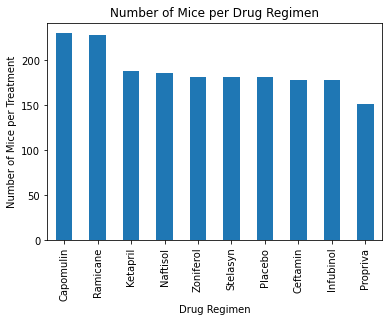

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# mice_counts = merge2_df['Drug Regimen'].value_counts()
# mice_counts
# mice_counts = mice_counts.plot(kind='bar')

plotdata = merge2_df['Drug Regimen'].value_counts()
plotdata.plot(kind="bar")

plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice per Treatment")

<function matplotlib.pyplot.show(*args, **kw)>

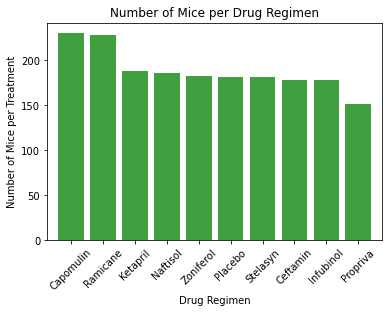

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

counts = merge2_df['Drug Regimen'].value_counts()
counts
len(counts)
x_axis = np.arange(0, len(counts),1)
y_axis = counts

plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice per Treatment")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'], rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)

plt.bar(x_axis, y_axis, color='green', align='center', alpha=.75)
plt.show


In [13]:
# unique_users_df = merge_df[["Mouse ID","Sex", "Age_months"]]

# unique_users_df.head(30)

# gender = unique_users_df["Sex"].value_counts()
# gender
# df = pd.DataFrame(gender)
df.head()

NameError: name 'df' is not defined

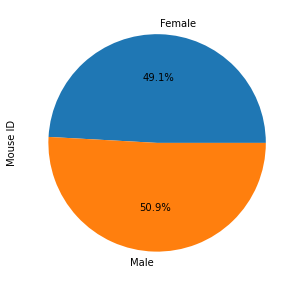

In [14]:
#this is without dropping duplicates and is closer to the values shown in the example, and is counting the mice for exach time they are tested


gender = merge2_df.groupby("Sex")

gender_df = gender["Mouse ID"].count()
gender_df

plotdata = gender_df.plot.pie(figsize=(5,5), autopct="%1.1f%%")

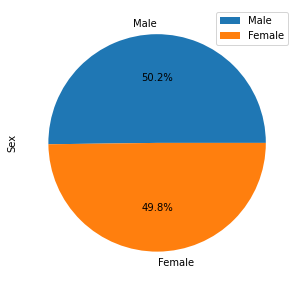

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#this is with dropped duplicates, so each mouse should only be being counted once

unique_users_df = merge2_df[["Mouse ID","Sex"]]
unique_users2_df = unique_users_df.drop_duplicates()
unique_users2_df.head(30)

gender = unique_users2_df["Sex"].value_counts()
gender
df = pd.DataFrame(gender)
df.head()

plotdata = df.plot.pie(y='Sex', figsize=(5,5), autopct="%1.1f%%")
# plotdata.plot(kind=pie)


(-1.1016630746735625,
 1.1000791940320744,
 -1.1017685314144794,
 1.1009347297692742)

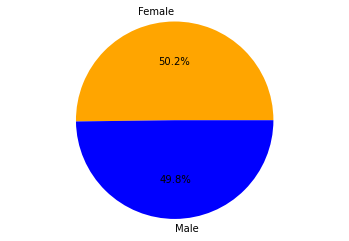

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels =['Female', 'Male']

sizes = [124, 125]

colors = ["orange", "blue"]

plt.pie(gender, labels=labels, colors=colors, autopct="%1.1f%%")

plt.axis("equal")
# df.head()

## Quartiles, Outliers and Boxplots

In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] 
# Start by getting the last (greatest) timepoint for each mouse

result_df = merge2_df[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
result_df.head()
result_df = result_df.loc[result_df['Drug Regimen'].isin(regimen_list),]
# timemax_df = result.groupby(['Drug Regimen', 'Mouse ID'])
# timemax_df.head(10)
# mtime = timemax_df.max("Timepoint")
# mtime.head(50)


# final_df.head(20)

max_timepoint_df = result_df.groupby('Mouse ID').last()
max_timepoint_df.head(20)
# final_df = pd.merge(result_df, max_timepoint, on='Drug Regimen', how='left')
# final_df.head(20)
# final_df = final_df.drop_duplicates(['Mouse ID', 'Drug Regimen'], keep='last')
# final_df
# timemax = result.groupby('Drug Regimen').max()
# timemax.head(10)
# cap = timemax_df['Timepoint'].max()
# cap.head(20)
# # timemax.head(10)
# # timept = timemax.loc['Drug Regimen', 'Mouse ID', 'cap']
# #           timemax = result.groupby('Timepoint').max()
# #           timemax.head(10)
# micetime = result_df.loc[result_df['Timepoint'] > 43, ['Mouse ID', 'Timepoint', 'Drug Regimen']]
# micetime.head(15)
# grouptime_df = micetime.groupby('Drug Regimen')
# grouptime_df.head(15)

# merge
# summary_df = pd.merge(merge2_df, timemax, on="Drug Regimen")

# capmax = merge2_df['Timepoint'].max()
# capmax
# capomulin_df = result[result['Drug Regimen'].isin(["Capomulin"])]
# capomulin_df.head()


# cap_timepoint = merge2_df.max()
# timepoint = merge2_df.loc['Mouse ID', 'Timepoint>']
# cap_volume = merge2_df.loc['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a275,Ceftamin,45,62.999356
a411,Ramicane,45,38.407618
a444,Ramicane,45,43.047543
a520,Ramicane,45,38.810366
a577,Infubinol,30,57.031862
a644,Ramicane,45,32.978522
a685,Infubinol,45,66.083066


In [97]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']  

# for row in
# row = next
for x in regimen_list:
    print("regimen_list " + x)
    temp = max_timepoint_df.loc[max_timepoint['Drug Regimen'].isin([x]),]
    print(temp)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

regimen_list Capomulin
         Drug Regimen  Timepoint  Tumor Volume (mm3)
Mouse ID                                            
b128        Capomulin         45           38.982878
b742        Capomulin         45           38.939633
f966        Capomulin         20           30.485985
g288        Capomulin         45           37.074024
g316        Capomulin         45           40.159220
i557        Capomulin         45           47.685963
i738        Capomulin         45           37.311846
j119        Capomulin         45           38.125164
j246        Capomulin         35           38.753265
l509        Capomulin         45           41.483008
l897        Capomulin         45           38.846876
m601        Capomulin         45           28.430964
m957        Capomulin         45           33.329098
r157        Capomulin         15           46.539206
r554        Capomulin         45           32.377357
r944        Capomulin         45           41.581521
s185        Capomulin  

In [ ]:
quartiles = california_data['AveOccup'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
outlier_occupancy


temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperatures)
plt.show()

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
